# Prediction of severity (Injury/No Injury) due to crashes.

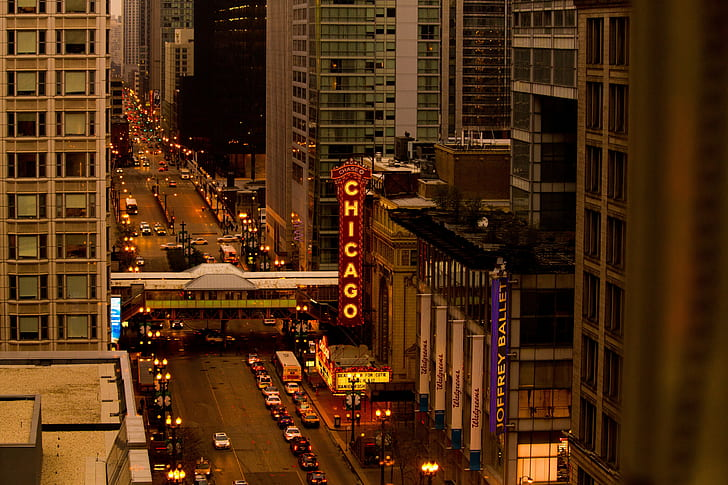

## Abstract:
    The most of the population in USA uses road as means of transportation and every year the percentage of accidents reported in the state of USA is increasing. So, I am interested in exploring the data of USA and among, them data portal of Chicagoo datasets provided relevant information to explore and find the insights of accidents occuring every year depending on the various aspects for every year, hour, day, month and minutes in particular location.
    The data from Chicago crashes dataset provided information about the crashes occured in several years and predicting the severity of injuries depending upon the various factors like weather, road condition, lighting condition, primary and secondary causes, traffic type, condition of device and even passenger conditions. Through EDA, I analysed the insights of accidents occuring in the year 2022. In modeling, I am using the insights and exploration of EDA to analyse the dataset, model the dataset and compare the results.
    The process of modeling started from cleaning the data with unwanted columns that includes columns with missing values of more than 90%, columns providing the correlation of greater than or equal to 70%, outliers numerical columns that affecting the dataset and the skewness in the dataset by calculating the upper limit and lower limit and comparing with Interquartile range. Later in the feature processing, the steps followed by me is initially dividing the cleaned and dropped dataset into numerical and categorical columns. Then, splitting the datasets into train and test samples with a split of 20%, imputing the numerical columns with 'median' after analysing from the EDA and standard scaling the data instead of minmaxscaler because standard scaler provides better performance and then impting the categorical data with most frequent values and encoding the data with binary 0 and 1. Finally transforming the data through column transformer for modeling. As my target variable is binary class which is imbalanced and categorical type. So, choosing logistic regression instead of linear regression because linear regression cannot perform regression on categorical variable and with decision trees classification for fitting the model, analysing the overfit in the model with accuracy scores and loss function. Then tuning the parameters with best search models and fitting the final model and cross validating the model with 6 folds and comparing the results of both Logistic regression and decision trees with factors of dimension reduction of pca and clustering with Kmeans of unsupervised learning to analyse the best results and best performance of the model.
    So, overall predicting the target variable by fitting into models of Logistic regression and decision trees and finding the best results from the factors that could reduce overfitting, impurities, skewness in the data.

## Importing Libraries

Importing necessary libraries for the process of Modeling. 

In [1]:
!pip install kneed

In [2]:
#importing libraries for data processing
import pandas as pd
import numpy as np
import datetime
import missingno as msno

#importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing libraries for feature processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

#Performance metrics import
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Dimension reduction imports
from sklearn.decomposition import PCA

#Clustering imports
from sklearn.cluster import KMeans
from kneed import KneeLocator

#Hyperparameters tuning imports
from sklearn.model_selection import GridSearchCV

#Cross validation imports
from sklearn.model_selection import cross_val_score


In [3]:
#ignoring warnings which are irrelavant.
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [5]:
#Ensemble imports    
from sklearn.ensemble import VotingClassifier

## Loading Dataset of Chicago Crashes  

Reading csv data of crashes in 2022 from Chicago data portal

### Data Cleaning

In [6]:
#Loading the data in the format of csv file using pandas library
df = pd.read_csv('https://raw.githubusercontent.com/SriBhanuGundu/Injury_predictions_on_Chicago_Data/main/data/Traffic_Crashes.csv', low_memory=False)

In [7]:
#printing the shape of dataset of 9568 rows with 49 ccolumns
print(f'Rows: {df.shape[0]:,} | Columns: {df.shape[1]:,}')

Rows: 9,568 | Columns: 49


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_RECORD_ID                9568 non-null   object 
 1   RD_NO                          8161 non-null   object 
 2   CRASH_DATE_EST_I               754 non-null    object 
 3   CRASH_DATE                     9568 non-null   object 
 4   POSTED_SPEED_LIMIT             9568 non-null   int64  
 5   TRAFFIC_CONTROL_DEVICE         9568 non-null   object 
 6   DEVICE_CONDITION               9568 non-null   object 
 7   WEATHER_CONDITION              9568 non-null   object 
 8   LIGHTING_CONDITION             9568 non-null   object 
 9   FIRST_CRASH_TYPE               9568 non-null   object 
 10  TRAFFICWAY_TYPE                9568 non-null   object 
 11  LANE_CNT                       0 non-null      float64
 12  ALIGNMENT                      9568 non-null   o

Dropping the columns with 100% null values

In [9]:
df_crashes = df.drop(columns = 'LANE_CNT')

Distribution of target variable

<AxesSubplot:>

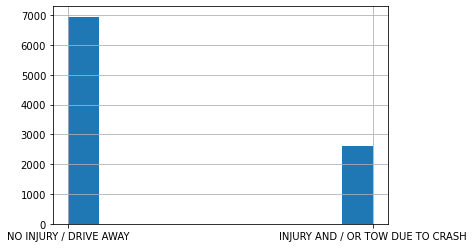

In [10]:
#choosing target variable
target = df_crashes['CRASH_TYPE']
df.CRASH_TYPE.hist()

In [11]:
df_crashes.CRASH_TYPE.value_counts()

NO INJURY / DRIVE AWAY              6946
INJURY AND / OR TOW DUE TO CRASH    2622
Name: CRASH_TYPE, dtype: int64

Class is imbalanced and this dataset seems to have the issues of bias and variance, hence choosing recall or other parameters for modeling than accuracy.

#### Dropping the colums which are irrelavant for modeling

Reason 1: Columns with greater than 90% null values.

Reason 2: Correlation with greater than 70%

Reason 3: skewness in the columns based on IQR calculated in the EDA.

Reason 4: Outliers in the data 


In [12]:
drop_list = ['CRASH_DATE_EST_I', 'RD_NO','REPORT_TYPE','DATE_POLICE_NOTIFIED', 
             'STREET_DIRECTION', 'BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I', 
             'DOORING_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I','LATITUDE', 
             'LONGITUDE','CRASH_RECORD_ID','INJURIES_UNKNOWN','STREET_NO',
             'MOST_SEVERE_INJURY','SEC_CONTRIBUTORY_CAUSE','LOCATION','STREET_NAME','PRIM_CONTRIBUTORY_CAUSE']

In [13]:
df_crashes = df_crashes.drop(columns = drop_list)

In [14]:
df_crashes = df_crashes.drop(columns = ['WORK_ZONE_I','CRASH_DATE','CRASH_HOUR','CRASH_DAY_OF_WEEK','CRASH_MONTH','INJURIES_NO_INDICATION','INJURIES_TOTAL','DAMAGE'])

Minimizing the categories in the columns that are duplicating the categories

In [15]:
df_crashes['WEATHER_CONDITION'] = df_crashes['WEATHER_CONDITION'].replace({'UNKNOWN':'UNKNOWN/OTHER','OTHER':'UNKNOWN/OTHER',
                                                     'FREEZING RAIN/DRIZZLE': 'SLEET/HAIL',
                                                     'BLOWING SNOW': 'SNOW',
                                                      'SEVERE CROSS WIND GATE': 'CLOUDY/OVERCAST',
                                                     'BLOWING SAND, SOIL, DIRT': 'UNKNOWN/OTHER'})
df_crashes.WEATHER_CONDITION.value_counts()

CLEAR              6923
SNOW               1207
UNKNOWN/OTHER       722
RAIN                251
CLOUDY/OVERCAST     247
SLEET/HAIL          210
FOG/SMOKE/HAZE        8
Name: WEATHER_CONDITION, dtype: int64

In [16]:
df_crashes['ROADWAY_SURFACE_COND'] =df_crashes['ROADWAY_SURFACE_COND'].replace({'UNKNOWN':'UNKNOWN/OTHER',
                                                                 'OTHER':'UNKNOWN/OTHER',
                                                               'SAND, MUD, DIRT': 'UNKNOWN/OTHER',
                                                                 'ICE': 'SNOW OR SLUSH'})
df_crashes.ROADWAY_SURFACE_COND.value_counts()

DRY              5300
SNOW OR SLUSH    2042
WET              1163
UNKNOWN/OTHER    1063
Name: ROADWAY_SURFACE_COND, dtype: int64

In [17]:
df_crashes['TRAFFIC_CONTROL_DEVICE']=df_crashes['TRAFFIC_CONTROL_DEVICE'].replace(
                            {'UNKNOWN':'UNKNOWN/OTHER',
                            'OTHER':'UNKNOWN/OTHER','TRAFFIC SIGNAL':'TRAFFIC_SIGNAL',
                            'FLASHING CONTROL SIGNAL':'STOP_SIGN/FALSHER','SCHOOL ZONE':'SCHOOL_ZONE','OTHER WARNING SIGN':'SIGN_WARNING','RAILROAD CROSSING GATE':'RAIL_CROSSING','PEDESTRIAN CROSSING SIGN':'PEDESTRIAN_CROSSING',
                              'OTHER RAILROAD CROSSING':'RAILROAD_CROSSING_GATE','STOP SIGN/FLASHER':'SIGN_WARNING','STOP SIGN/FALSHER':'SIGN_WARNING','OTHER REG. SIGN':'SIGN_WARNING','RR CROSSING SIGN':'SIGN_WARNING'})
df_crashes.TRAFFIC_CONTROL_DEVICE.value_counts()

NO CONTROLS               5365
TRAFFIC_SIGNAL            2644
SIGN_WARNING              1019
UNKNOWN/OTHER              474
PEDESTRIAN_CROSSING         15
RAIL_CROSSING               12
STOP_SIGN/FALSHER            9
YIELD                        9
DELINEATORS                  7
SCHOOL_ZONE                  7
POLICE/FLAGMAN               4
RAILROAD_CROSSING_GATE       3
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

In [18]:
df_crashes['TRAFFICWAY_TYPE'] = df_crashes['TRAFFICWAY_TYPE'].replace({'T-INTERSECTION':'INTERSECTION', 'UNKNOWN INTERSECTION TYPE':'INTERSECTION',
                                                'Y-INTERSECTION':'INTERSECTION','L-INTERSECTION':'INTERSECTION',
                                                 'FIVE POINT, OR MORE': 'INTERSECTION', 'FOUR WAY':'INTERSECTION',
                                                 'ROUNDABOUT': 'INTERSECTION', 'OTHER': 'UNKNOWN/OTHER',
                                                'UNKNOWN':'UNKNOWN/OTHER','NOT REPORTED':'UNKNOWN/OTHER',
                                                'TRAFFIC ROUTE':'UNKNOWN/OTHER','CENTER TURN LANE':'CENTER_TURN_LANE','DIVIDED - W/MEDIAN BARRIER':'DIVIDED_W/MEDIAN_BARRIER','DIVIDED - W/MEDIAN (NOT RAISED)':'DIVIDED_W/MEDIAN','PARKING LOT':'PARKING_LOT','NOT DIVIDED':'NOT_DIVIDED'})
#printing new value counts
df_crashes.TRAFFICWAY_TYPE.value_counts()

NOT_DIVIDED                 3958
DIVIDED_W/MEDIAN            1292
ONE-WAY                     1264
INTERSECTION                1237
PARKING_LOT                  635
DIVIDED_W/MEDIAN_BARRIER     502
UNKNOWN/OTHER                418
ALLEY                        166
CENTER_TURN_LANE              35
DRIVEWAY                      33
RAMP                          28
Name: TRAFFICWAY_TYPE, dtype: int64

In [19]:
df_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   POSTED_SPEED_LIMIT             9568 non-null   int64  
 1   TRAFFIC_CONTROL_DEVICE         9568 non-null   object 
 2   DEVICE_CONDITION               9568 non-null   object 
 3   WEATHER_CONDITION              9568 non-null   object 
 4   LIGHTING_CONDITION             9568 non-null   object 
 5   FIRST_CRASH_TYPE               9568 non-null   object 
 6   TRAFFICWAY_TYPE                9568 non-null   object 
 7   ALIGNMENT                      9568 non-null   object 
 8   ROADWAY_SURFACE_COND           9568 non-null   object 
 9   ROAD_DEFECT                    9568 non-null   object 
 10  CRASH_TYPE                     9568 non-null   object 
 11  INTERSECTION_RELATED_I         2337 non-null   object 
 12  NOT_RIGHT_OF_WAY_I             473 non-null    o

# Modeling

## Feature Processing

Seperating the features based on numerical and categorical data 

In [20]:
#numerical and categorical variables for modeling
numeric_cols = df_crashes.select_dtypes(include = [np.number])
category_cols = df_crashes.drop(columns = 'CRASH_TYPE').select_dtypes(include = 'O')
print("Numeric columns : \n",numeric_cols.columns)
print("\nCategory columns : \n",category_cols.columns)

numerical_vars = numeric_cols.columns.tolist()
categorical_Vars = category_cols.columns.tolist()

Numeric columns : 
 Index(['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT'],
      dtype='object')

Category columns : 
 Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I'],
      dtype='object')


splitting the data with 20% data for test and random state of 124.

In [21]:
#splitting dataset into train and test
cat_features = [x for x in category_cols.columns if x != 'CRASH_TYPE']

features = numerical_vars + cat_features
X = df_crashes[features]
y = df_crashes['CRASH_TYPE']

# split the data to training and test datasets with 20% of data for test (test_size = 0.2) and random state of 124 (random_state = 124)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,654
Records in test data: 1,914

Features:
POSTED_SPEED_LIMIT
NUM_UNITS
INJURIES_FATAL
INJURIES_INCAPACITATING
INJURIES_NON_INCAPACITATING
INJURIES_REPORTED_NOT_EVIDENT
TRAFFIC_CONTROL_DEVICE
DEVICE_CONDITION
WEATHER_CONDITION
LIGHTING_CONDITION
FIRST_CRASH_TYPE
TRAFFICWAY_TYPE
ALIGNMENT
ROADWAY_SURFACE_COND
ROAD_DEFECT
INTERSECTION_RELATED_I
NOT_RIGHT_OF_WAY_I
HIT_AND_RUN_I


Imputing missing data with mean and standardizing the data 

In [22]:
#created a pipeline to process numerical data
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='mean')),
                           ('standardize_num', StandardScaler())
                        ])

#pipelines on the training data for the numerical features that expected after dropping columns that risking multicolinearity.
X_train_num = num_pipeline.fit_transform(X_train[numerical_vars])

X_train_num.shape

(7654, 6)

imputing the categorical data with most frequent values and encoding with binary one hot encoding 

In [23]:
#created a pipeline for the categorical data
from sklearn.preprocessing import LabelEncoder
cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown = 'ignore', sparse = False))])

#pipeline is fitted for the data after applying fit_transform on training data
X_train_cat = cat_pipeline.fit_transform(X_train[cat_features])

X_train_cat
print(X_train_cat.shape)


(7654, 84)


Transforming the data into the pipeline and ensuring the shape is retained 

In [24]:
#created a pipeline that combined numerical and categorical data.
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_vars),
                                                      ('create_dummies', cat_pipeline, cat_features)])
#print(processing_pipeline)
print(processing_pipeline.fit_transform(X_train).shape)

data = processing_pipeline.fit_transform(X_train)

(7654, 90)


numerical columns after fit transform had 6 columns with categorical 84 columns and finally after transforming with 90 columns ensuring data is retained without any loss

## Logistic Regression

In [25]:
# modeling pipeline to the logistic regression
logreg_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression())]
    )


# Fitting the pipeline for logistic regression
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('logreg', LogisticRegression())])

In [26]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Classification report

In [27]:
X_hat = logreg_pipeline.fit(X_train, y_train).predict(X_train)
y_hat = logreg_pipeline.fit(X_train, y_train).predict(X_test)
y_train_hat = logreg_pipeline.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, y_hat))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, y_train_hat))


----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.90      0.54      0.68       535
          NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379

                        accuracy                           0.86      1914
                       macro avg       0.87      0.76      0.79      1914
                    weighted avg       0.86      0.86      0.84      1914

----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR T

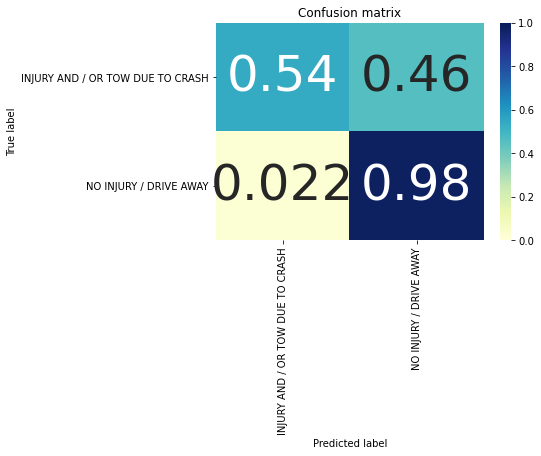

In [28]:
cm = confusion_matrix(y_test, y_hat)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = logreg_pipeline.classes_, title='Confusion matrix')
plt.show()

In [29]:
print(f'Accuracy on train data:{accuracy_score(y_train,X_hat):.2%}')
print(f'Accuracy on test data:{accuracy_score(y_test,y_hat):.2%}')
train_precision = precision_score(y_train,X_hat,average = 'macro')
test_precision = precision_score(y_test,y_hat,average = 'macro')
print(f'Precision on train data:{train_precision:.2%}')
print(f'Precision on test data:{test_precision:.2%}')
train_recall = recall_score(y_train, X_hat, average='macro')
test_recall = recall_score(y_test, y_hat, average='macro')
print(f'Recall on train data:{train_recall:.2%}')
print(f'Recall on test data:{test_recall:.2%}')

Accuracy on train data:87.13%
Accuracy on test data:85.53%
Precision on train data:88.48%
Precision on test data:87.44%
Recall on train data:78.32%
Recall on test data:75.89%


#### Loss Function

In [30]:

pred_proba = logreg_pipeline.predict_proba(X_train)
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))
pred_proba_t = logreg_pipeline.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.31443234037164347
The Log Loss on Testing Dataset is:  0.35059837321363496


In [31]:

logreg_pipeline.fit(X_train, y_train).score(X_train, y_train)

0.8713091194146851

In [32]:
logreg_pipeline.fit(X_train, y_train).score(X_test, y_test)

0.855276907001045

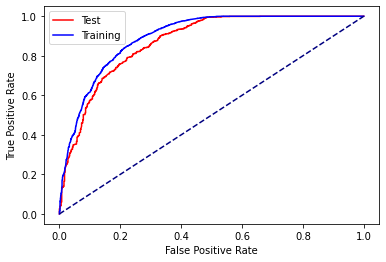

In [33]:
def generate_probs(X, model=logreg_pipeline):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label='NO INJURY / DRIVE AWAY')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [34]:
roc_auc_score(y_train, generate_probs(X_train))

0.894628005455862

In [35]:
roc_auc_score(y_test, generate_probs(X_test))

0.8706796879765237

#### Comments:
From the data, the accuracy or training data is 87.13% and testing data is 85.53%, As I am choosing recall(percentages of true positive predicted) as a parameter which is 78.32% for training data, and 75.89% for the testing data with loss functions of 0.3144 on training data and 0.3505 on tesing data, clearly shows the dataset had an issues of overfitting, So, tuning of hyper parameters is required

### Decision Tree

In [36]:

dttree_pipeline = Pipeline([
    ('data_processing', processing_pipeline),    
    ('dt', DecisionTreeClassifier())]
)
dttree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('dt', DecisionTreeClassifier())])

In [37]:
y_testp_dt = dttree_pipeline.fit(X_train, y_train).predict(X_test)
y_trainp_dt = dttree_pipeline.fit(X_train, y_train).predict(X_train)

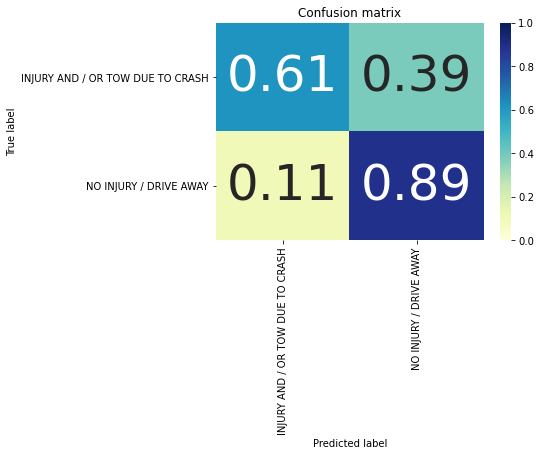

In [38]:
cm = confusion_matrix(y_test, y_testp_dt)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = dttree_pipeline.classes_, title='Confusion matrix')
plt.show()

In [39]:


print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, y_trainp_dt))
print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, y_testp_dt))


----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.94      0.86      0.90      2087
          NO INJURY / DRIVE AWAY       0.95      0.98      0.96      5567

                        accuracy                           0.95      7654
                       macro avg       0.94      0.92      0.93      7654
                    weighted avg       0.95      0.95      0.94      7654

----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR T

In [40]:
print(f'Accuracy on train data:{accuracy_score(y_train,y_trainp_dt):.2%}')
print(f'Accuracy on test data:{accuracy_score(y_test,y_testp_dt):.2%}')
train_precision = precision_score(y_train,y_trainp_dt,average = 'macro')
test_precision = precision_score(y_test,y_testp_dt,average = 'macro')
print(f'Precision on train data:{train_precision:.2%}')
print(f'Precision on test data:{test_precision:.2%}')
train_recall = recall_score(y_train, y_trainp_dt, average='macro')
test_recall = recall_score(y_test, y_testp_dt, average='macro')
print(f'Recall on train data:{train_recall:.2%}')
print(f'Recall on test data:{test_recall:.2%}')

Accuracy on train data:94.56%
Accuracy on test data:81.56%
Precision on train data:94.25%
Precision on test data:77.40%
Recall on train data:91.86%
Recall on test data:75.42%


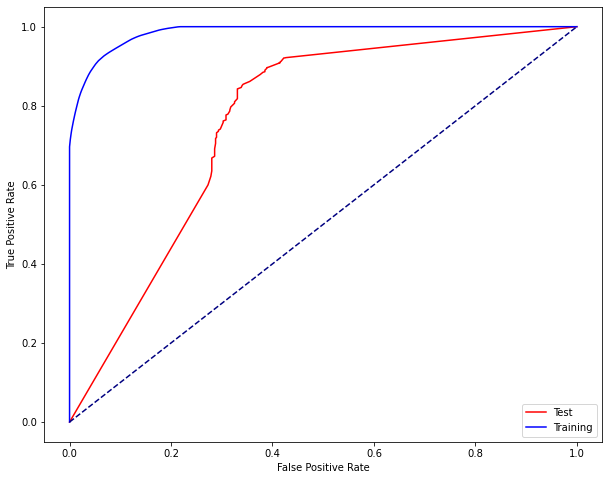

In [41]:
def generate_probs(X, model=dttree_pipeline):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label='NO INJURY / DRIVE AWAY')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [42]:
roc_auc_score(y_train, generate_probs(X_train))

0.9859858074254912

In [43]:
roc_auc_score(y_test, generate_probs(X_test))

0.7601594003510603

#### Comments:
From the data of decision trees, the difference between the training data and testing data with performance metrics shows huge difference due to high overfitting issues and impurities in the data in which training accuracy is 94.56% and testing accuracy is 81.45%, So tuning with hyper parameters is required and when compared with logistic regression, decision trees is not an appropriate model.

### PCA to find number of components for dimension reduction

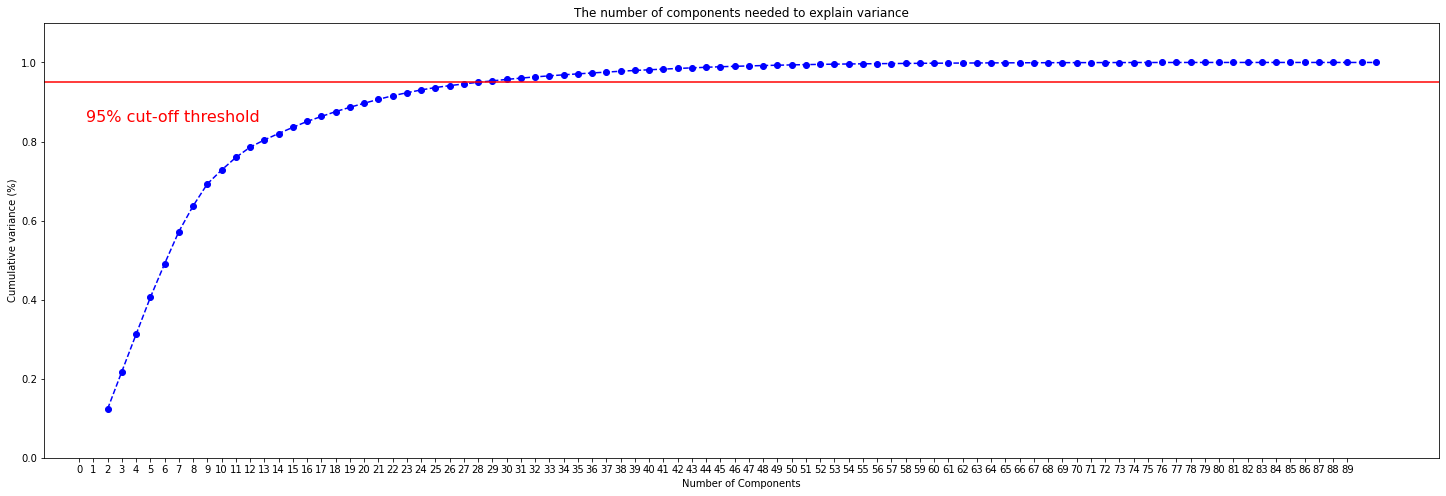

In [44]:
data_rescaled = processing_pipeline.fit_transform(X_train)
pca = PCA().fit(data_rescaled)
ems = pca.explained_variance_ratio_
y = np.cumsum(ems)
fig = plt.figure(figsize = (25, 8))
xi = np.arange(2, 92, step=1)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 90, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

#ax.grid(axis='x')
plt.show()


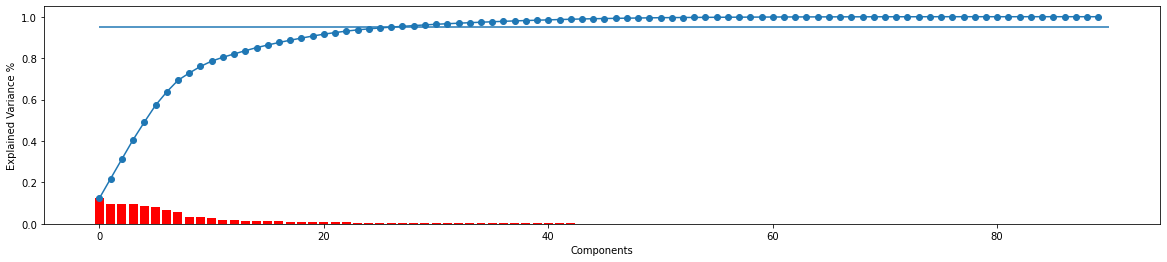

In [45]:
fig = plt.figure(figsize = (20, 4))
plt.plot(np.cumsum(ems), '-o')
plt.bar(np.arange(np.size(ems)), ems, color='red')
plt.ylabel('Explained Variance %')
plt.xlabel('Components')
plt.hlines(.95, 0, np.size(ems))

plt.show()

In [46]:
print(f'variance ratio with 27 components of more than 95% threshold is: { y[27] :.2%}')

variance ratio with 27 components of more than 95% threshold is: 95.34%


#### Comments:
From both the graphs, 27 components had threshold of more than 95% variance

### Clustering to find optimal k value from distortions

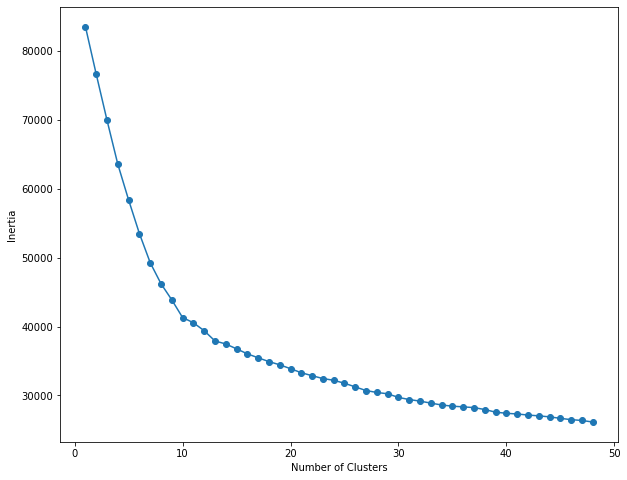

optimal k value with pipeline: 13


In [47]:
distortions = list()

n = 49
for i in range(1, n):
    km = KMeans(n_clusters=i, random_state=0)
    km = km.fit(data_rescaled)
    distortions.append(km.inertia_)
    
plt.plot(range(1, n), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

kn_pipe = KneeLocator(list(range(1,49)), distortions, S=1.0, curve='convex', direction='decreasing')
print("optimal k value with pipeline:", kn_pipe.knee)

From the elbow plot, the optimal k value is 13

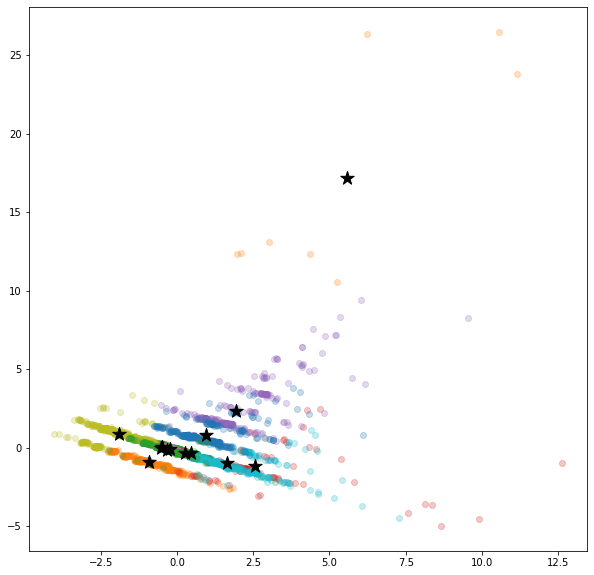

In [48]:
pipe_clust = Pipeline([('data_processing', processing_pipeline),
                   ('pca', PCA(n_components = 27))
                  ])
clust = pipe_clust.fit_transform(X_train)
km = KMeans(n_clusters=13, random_state=0)
km = km.fit(clust)
pclusters = km.predict(clust)
pclusters
fig = plt.figure(figsize = (10, 10))
for i in [0,1,2,3,4,5,6,7,8,9,10,11,12,13]:
    plt.scatter(clust[pclusters==i, 0], clust[pclusters==i, 1], alpha=0.25)
# plotting the cluster centroids
plt.scatter(km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=200,
    marker='*',
    c='black',
    label='Centroids')
plt.show()

#### Comments:
plotting with 13 clusters in 27 components shows outliers and the distance of centroids, shows significant amount of outliers and the conclusions from the graph are insignificant

## Hyper parameter tuning

#### Logistic Regression 

In [49]:
p = Pipeline([('data_processing', processing_pipeline), 
              ('model', LogisticRegression(solver = 'liblinear', penalty = 'l2'))
             ])

params = {'model__C': [0.01,1,2,5,8,9,10,11,12,13]}

first_search = GridSearchCV(p, param_grid=params)
first_search = first_search.fit(X_train, y_train)

print(f'Validation score: {first_search.best_score_:.2%}')
print(f'Train score: {first_search.score(X_train, y_train):.2%}')
print(f'Test score: {first_search.score(X_test, y_test):.2%}')
first_search.best_estimator_

Validation score: 86.86%
Train score: 87.22%
Test score: 85.53%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('model', LogisticRegression(C=5, solver='liblinear'))])

In [50]:
params = {'model__C': [3,4,4.5,5,5.5,6]}

second = GridSearchCV(p, param_grid=params)
second = second.fit(X_train, y_train)

print(f'Validation score: {second.best_score_:.2%}')
print(f'Train score: {second.score(X_train, y_train):.2%}')
print(f'Test score: {second.score(X_test, y_test):.2%}')
second.best_estimator_

Validation score: 86.87%
Train score: 87.22%
Test score: 85.53%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('model', LogisticRegression(C=4.5, solver='liblinear'))])

### Decision Tree

In [51]:
tr = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier(criterion = 'entropy'))]
)

param_grid = [
  {
   'dt__max_depth': [8,9,10,11,12],
   'dt__min_samples_leaf': [1.5,2,2.5],
   'dt__min_samples_split':[2,3,6,9]
   
  }
 ]

tree_first = GridSearchCV(estimator=tr, 
                           param_grid=param_grid)
tree_first = tree_first.fit(X_train, y_train)
print(f'Validation score: {tree_first.best_score_:.2%}')
print(f'Train score: {tree_first.score(X_train, y_train):.2%}')
print(f'Test score: {tree_first.score(X_test, y_test):.2%}')
tree_first.best_estimator_

Validation score: 85.84%
Train score: 87.09%
Test score: 84.80%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        min_samples_leaf=2,
                                        min_samples_split=3))])

In [52]:
tr = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier(criterion = 'entropy',max_depth=9,min_samples_leaf=2))]
)
param_grid = [
  {
   'dt__min_samples_split':[2.5,3,3.5,4,5.5,6,6.5,7,8,9,10]
  }
 ]

tree_second = GridSearchCV(estimator=tr, 
                           param_grid=param_grid)
tree_second = tree_second.fit(X_train, y_train)
print(f'Validation score: {tree_second.best_score_:.2%}')
print(f'Train score: {tree_second.score(X_train, y_train):.2%}')
print(f'Test score: {tree_second.score(X_test, y_test):.2%}')
tree_second.best_estimator_

Validation score: 85.84%
Train score: 87.09%
Test score: 84.80%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        min_samples_leaf=2,
                                        min_samples_split=3))])

#### Logistic Regression with dimension reduction using PCA

In [53]:
p = Pipeline([('data_processing', processing_pipeline), 
              ('pca', PCA()),
              ('model', LogisticRegression(penalty = 'l2', solver = 'liblinear'))
             ])

params = {'pca__n_components': [10,20,50,60,70,78],'model__C': [1,2,5,10,15,20] }

lrfirst_search = GridSearchCV(p, param_grid=params)
lrfirst_search = lrfirst_search.fit(X_train, y_train)

print(f'Validation score: {lrfirst_search.best_score_:.2%}')
print(f'Train score: {lrfirst_search.score(X_train, y_train):.2%}')
print(f'Test score: {lrfirst_search.score(X_test, y_test):.2%}')
lrfirst_search.best_estimator_

Validation score: 86.92%
Train score: 87.20%
Test score: 85.53%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('pca', PCA(n_components=70)),
                ('model', LogisticRegression(C=5, solver='liblinear'))])

In [54]:
params = {'pca__n_components': [60,66,67,68,69,70,71,72],'model__C': [1,2,3,4,5,6,7] }

lrsecond_search = GridSearchCV(p, param_grid=params)
lrsecond_search = lrsecond_search.fit(X_train, y_train)

print(f'Validation score: {lrsecond_search.best_score_:.2%}')
print(f'Train score: {lrsecond_search.score(X_train, y_train):.2%}')
print(f'Test score: {lrsecond_search.score(X_test, y_test):.2%}')
lrsecond_search.best_estimator_

Validation score: 86.96%
Train score: 87.13%
Test score: 85.48%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('pca', PCA(n_components=68)),
                ('model', LogisticRegression(C=3, solver='liblinear'))])

### Decision tree with Dimension reduction using PCA

In [55]:
tr = Pipeline([
    ('data_processing', processing_pipeline),
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=2, min_samples_split=5))]
)

param_grid = [
  {
   'pca__n_components': [20,60,70],
   'dt__max_depth': [5,8,9,10,11,12]     
  }
 ]

tree_resultsfirst = GridSearchCV(estimator=tr, 
                           param_grid=param_grid)
tree_resultsfirst = tree_resultsfirst.fit(X_train, y_train)
print(f'Validation score: {tree_resultsfirst.best_score_:.2%}')
print(f'Train score: {tree_resultsfirst.score(X_train, y_train):.2%}')
print(f'Test score: {tree_resultsfirst.score(X_test, y_test):.2%}')
tree_resultsfirst.best_estimator_

Validation score: 85.22%
Train score: 86.06%
Test score: 85.21%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('pca', PCA(n_components=20)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=2,
                                        min_samples_split=5))])

In [56]:
tr = Pipeline([
    ('data_processing', processing_pipeline),
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=2, min_samples_split=5))]
)

param_grid = [
  {
   'pca__n_components': [30,40,50,55,56,57,58,59,60,61,62,63],
   'dt__max_depth': [4,5,6,7,8,9]     
  }
 ]

tree_resultssecond = GridSearchCV(estimator=tr, 
                           param_grid=param_grid)
tree_resultssecond = tree_resultssecond.fit(X_train, y_train)
print(f'Validation score: {tree_resultssecond.best_score_:.2%}')
print(f'Train score: {tree_resultssecond.score(X_train, y_train):.2%}')
print(f'Test score: {tree_resultssecond.score(X_test, y_test):.2%}')
tree_resultssecond.best_estimator_

Validation score: 85.45%
Train score: 87.05%
Test score: 84.90%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('pca', PCA(n_components=56)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=2,
                                        min_samples_split=5))])

In [57]:
tr = Pipeline([
    ('data_processing', processing_pipeline),
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=2, min_samples_split=5))]
)

param_grid = [
  {
   'pca__n_components': [10, 25,16,17,18,19,30,31,32,45,46,47,48,49,50,51,52],
   'dt__max_depth': [4,5,6,7,8,9]     
  }
 ]

tree_resultsthird = GridSearchCV(estimator=tr, 
                           param_grid=param_grid)
tree_resultsthird = tree_resultsthird.fit(X_train, y_train)
print(f'Validation score: {tree_resultsthird.best_score_:.2%}')
print(f'Train score: {tree_resultsthird.score(X_train, y_train):.2%}')
print(f'Test score: {tree_resultsthird.score(X_test, y_test):.2%}')
tree_resultsthird.best_estimator_

Validation score: 85.51%
Train score: 87.07%
Test score: 85.01%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('pca', PCA(n_components=46)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        min_samples_leaf=2,
                                        min_samples_split=5))])

### Clustering with Kmeans on Logistic regression

In [58]:
pkmeans = Pipeline([('data_processing', processing_pipeline),
             ('kmeans', KMeans()),                          
             ('logreg', LogisticRegression(solver = 'liblinear', penalty = 'l2'))])

param_grid = [
  {'kmeans__n_clusters': [20,50,70], 'logreg__C': [1,2,4,5,6,7]}
 ]

gcv_firstmeans = GridSearchCV(estimator=pkmeans, param_grid=param_grid)
gcv_firstmeans = gcv_firstmeans.fit(X_train, y_train)
print(f'Validation score: {gcv_firstmeans.best_score_:.2%}')
print(f'Train score: {gcv_firstmeans.score(X_train, y_train):.2%}')
print(f'Test score: {gcv_firstmeans.score(X_test, y_test):.2%}')
gcv_firstmeans.best_estimator_


Validation score: 86.69%
Train score: 86.80%
Test score: 86.21%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('kmeans', KMeans(n_clusters=70)),
                ('logreg', LogisticRegression(C=6, solver='liblinear'))])

In [59]:
pkmeans = Pipeline([('data_processing', processing_pipeline),
             ('kmeans', KMeans()),                          
             ('logreg', LogisticRegression(solver = 'liblinear', penalty = 'l2'))])

param_grid = [
  {'kmeans__n_clusters': [18,19,20,21,22,46,47,48,49,50,51,52,68,69,70,71,72,73], 'logreg__C': [0.1,1,1.5,2,2.5,3,4,5,6,7,7.5,8]}
 ]

gcv_secondkmeans = GridSearchCV(estimator=pkmeans, param_grid=param_grid)
gcv_secondkmeans = gcv_secondkmeans.fit(X_train, y_train)
print(f'Validation score: {gcv_secondkmeans.best_score_:.2%}')
print(f'Train score: {gcv_secondkmeans.score(X_train, y_train):.2%}')
print(f'Test score: {gcv_secondkmeans.score(X_test, y_test):.2%}')
gcv_secondkmeans.best_estimator_

Validation score: 86.71%
Train score: 86.82%
Test score: 85.74%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('kmeans', KMeans(n_clusters=69)),
                ('logreg', LogisticRegression(C=6, solver='liblinear'))])

### Clustering with Kmeans on Decision trees

In [60]:
tr = Pipeline([
    ('data_processing', processing_pipeline),
    ('kmeans', KMeans()),
    ('dt', DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=2, min_samples_split=5))]
)

param_grid = [
  {
   'kmeans__n_clusters': [1,10,20,50,68,69,70,71,72],
   'dt__max_depth': [1,2,5,8,9,10,11,12]     
  }
 ]

kmeanstree_firstresults = GridSearchCV(estimator=tr, 
                           param_grid=param_grid)
kmeanstree_firstresults = kmeanstree_firstresults.fit(X_train, y_train)
print(f'Validation score: {kmeanstree_firstresults.best_score_:.2%}')
print(f'Train score: {kmeanstree_firstresults.score(X_train, y_train):.2%}')
print(f'Test score: {kmeanstree_firstresults.score(X_test, y_test):.2%}')
kmeanstree_firstresults.best_estimator_

Validation score: 85.51%
Train score: 87.26%
Test score: 84.33%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('kmeans', KMeans(n_clusters=10)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=2,
                                        min_samples_split=5))])

In [61]:
tr = Pipeline([
    ('data_processing', processing_pipeline),
    ('kmeans', KMeans()),
    ('dt', DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=2, min_samples_split=5))]
)

param_grid = [
  {
   
   'kmeans__n_clusters': [15,16,17,18,19,20,21,22,46,48,49,50,51,52,53,68,69,70],     
  }
 ]

kmeanstree_secondresults = GridSearchCV(estimator=tr, 
                           param_grid=param_grid)
kmeanstree_secondresults = kmeanstree_secondresults.fit(X_train, y_train)
print(f'Validation score: {kmeanstree_secondresults.best_score_:.2%}')
print(f'Train score: {kmeanstree_secondresults.score(X_train, y_train):.2%}')
print(f'Test score: {kmeanstree_secondresults.score(X_test, y_test):.2%}')
kmeanstree_secondresults.best_estimator_

Validation score: 85.75%
Train score: 85.55%
Test score: 84.33%


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['POSTED_SPEED_LIMIT',
                                                   'NUM_UNITS',
                                                   'INJURIES_FATAL',
                                                   'INJURIES_INCAPACITATING',
                                                   'INJURIES_NON_INCAPACITATING',
                                                   'INJURIES_REPORTED_NOT_EVIDENT']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('...
                                                  ['TRAFFIC_CONTROL_DEVICE',
                                                   'DEVICE_CONDITION',
                                                   'WEATHER_CONDITION',
                                                   'LIGHTING_CONDITION',
                                                   'FIRST_CRASH_TYPE',
                                                   'TRAFFICWAY_TYPE',
                                                   'ALIGNMENT',
                                                   'ROADWAY_SURFACE_COND',
                                                   'ROAD_DEFECT',
                                                   'INTERSECTION_RELATED_I',
                                                   'NOT_RIGHT_OF_WAY_I',
                                                   'HIT_AND_RUN_I'])])),
                ('kmeans', KMeans(n_clusters=15)),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=2,
                                        min_samples_split=5))])

n_clusters=18,criterion='entropy', max_depth=5, min_samples_leaf=2,min_samples_split=5

### Performance metrics on the grid search cv results

Calculating precision, accuracy, recall and roc_auc after tuning the model with the best hyperparameters

#### With Logistic Regression

In [62]:
print("Logistic Regression ")
ytestlg_pred = second.fit(X_train, y_train).predict(X_test)
ytrainlg_pred = second.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytestlg_pred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytrainlg_pred))

print("Logistic Regression with Pca")
ytestlg_pcapred = lrsecond_search.fit(X_train, y_train).predict(X_test)
ytrainlg_pcapred = lrsecond_search.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytestlg_pcapred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytrainlg_pcapred))

print("Logistic Regression with Kmeans")
ytestlg_kmpred = gcv_secondkmeans.fit(X_train, y_train).predict(X_test)
ytrainlg_kmpred = gcv_secondkmeans.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytestlg_kmpred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytrainlg_kmpred))

Logistic Regression 
----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.90      0.55      0.68       535
          NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379

                        accuracy                           0.86      1914
                       macro avg       0.87      0.76      0.79      1914
                    weighted avg       0.86      0.86      0.84      1914

----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   suppo

#### Comments:
From the three models of logistic regression independent model, logistic regression with pca and logistic regression with kmeans, slightly improves performance metrics and scores from classification report are found to similar in case of logistic regression with kmeans and logistic regression model than the model of logistic regression with pca.

#### With Decision trees

In [63]:
print("Decision tree ")
ytesttr_pred = tree_second.fit(X_train, y_train).predict(X_test)
ytraintr_pred = tree_second.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytesttr_pred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytraintr_pred))

print("Decision tree with Pca")
ytesttr_pcapred = tree_resultsthird.fit(X_train, y_train).predict(X_test)
ytraintr_pcapred = tree_resultsthird.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytesttr_pcapred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytraintr_pcapred))

print("Decision tree with Kmeans")
ytesttr_kmpred = kmeanstree_secondresults.fit(X_train, y_train).predict(X_test)
ytraintr_kmpred = kmeanstree_secondresults.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytesttr_kmpred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytraintr_kmpred))

Decision tree 
----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.90      0.52      0.65       535
          NO INJURY / DRIVE AWAY       0.84      0.98      0.90      1379

                        accuracy                           0.85      1914
                       macro avg       0.87      0.75      0.78      1914
                    weighted avg       0.85      0.85      0.83      1914

----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

IN

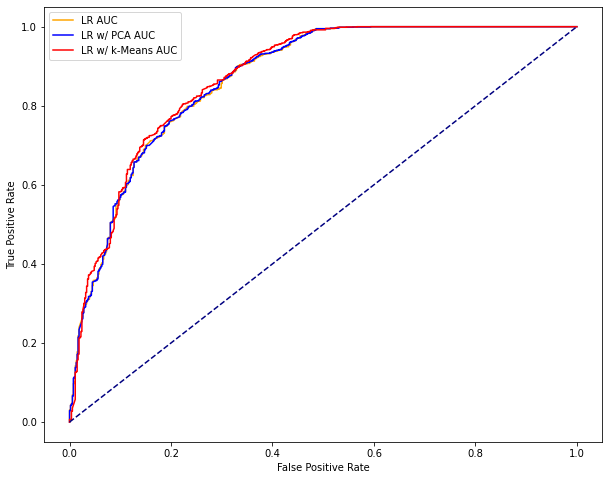

In [64]:
def generate_probs(X, model=pkmeans):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label='NO INJURY / DRIVE AWAY')
    return fpr, tpr

fpr1_test, tpr1_test = generate_roc(y_test, generate_probs(X_test, model=second))
fpr2_test, tpr2_test = generate_roc(y_test, generate_probs(X_test,model=lrsecond_search))
fpr3_test, tpr3_test = generate_roc(y_test, generate_probs(X_test, model=gcv_secondkmeans))


plt.plot(fpr1_test, tpr1_test,'orange')
plt.plot(fpr2_test, tpr2_test,'blue')
plt.plot(fpr3_test, tpr3_test,'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['LR AUC','LR w/ PCA AUC','LR w/ k-Means AUC'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()


In [65]:
log = roc_auc_score(y_test, second.predict_proba(X_test)[:,1]) 
log_pca = roc_auc_score(y_test, lrsecond_search.predict_proba(X_test)[:,1])
log_kmn = roc_auc_score(y_test, gcv_secondkmeans.predict_proba(X_test)[:,1])

print(f'LR AUC: {log:.2%}')
print(f'LR w/ PCA AUC: {log_pca:.2%}')
print(f'LR w/ k-Means AUC: {log_kmn:.2%}')


LR AUC: 87.01%
LR w/ PCA AUC: 87.06%
LR w/ k-Means AUC: 87.51%


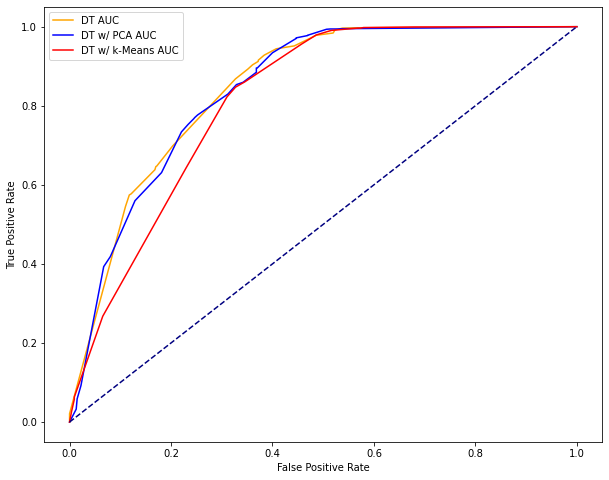

In [66]:
def generate_probs(X, model=pkmeans):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label='NO INJURY / DRIVE AWAY')
    return fpr, tpr

fpr1_test, tpr1_test = generate_roc(y_test, generate_probs(X_test, model=tree_second))
fpr2_test, tpr2_test = generate_roc(y_test, generate_probs(X_test,model=tree_resultsthird))
fpr3_test, tpr3_test = generate_roc(y_test, generate_probs(X_test, model=kmeanstree_secondresults))


plt.plot(fpr1_test, tpr1_test,'orange')
plt.plot(fpr2_test, tpr2_test,'blue')
plt.plot(fpr3_test, tpr3_test,'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['DT AUC','DT w/ PCA AUC','DT w/ k-Means AUC'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()


In [67]:
dt = roc_auc_score(y_test, tree_second.predict_proba(X_test)[:,1]) 
dt_pca = roc_auc_score(y_test, tree_resultsthird.predict_proba(X_test)[:,1])
dt_kmn = roc_auc_score(y_test, kmeanstree_secondresults.predict_proba(X_test)[:,1])

print(f'DT AUC: {dt:.2%}')
print(f'DT w/ PCA AUC: {dt_pca:.2%}')
print(f'DT w/ k-Means AUC: {dt_kmn:.2%}')


DT AUC: 84.71%
DT w/ PCA AUC: 84.34%
DT w/ k-Means AUC: 81.53%


#### Comments:
From all the three models in decision tree, Decision tree  and  with KMeans performs better and able to reduce large amount of overfitting and impurities.


### Fitting the pipelines with the parameters for cross validation

In [68]:
logpipe = Pipeline([('data_processing', processing_pipeline), 
              ('model', LogisticRegression(solver = 'liblinear', penalty = 'l2', C=4.5))
             ])
logpipe = logpipe.fit(X_train,y_train)
ytestlg_pred = logreg_pipeline.fit(X_train, y_train).predict(X_test)
ytrainlg_pred = logreg_pipeline.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytestlg_pred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytrainlg_pred))



----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.90      0.54      0.68       535
          NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379

                        accuracy                           0.86      1914
                       macro avg       0.87      0.76      0.79      1914
                    weighted avg       0.86      0.86      0.84      1914

----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR T

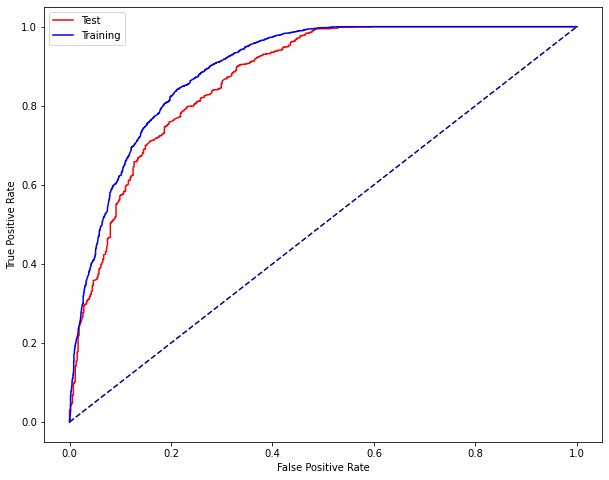

In [69]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=logpipe):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label='NO INJURY / DRIVE AWAY')
    return fpr, tpr


fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [70]:
#Accuracy
print(f'Accuracy on train data:{accuracy_score(y_train,ytrainlg_pred):.2%}')
print(f'Accuracy on test data:{accuracy_score(y_test,ytestlg_pred):.2%}')
train_precision = precision_score(y_train,ytrainlg_pred,average = 'macro')
test_precision = precision_score(y_test,ytestlg_pred,average = 'macro')
print(f'Precision on train data:{train_precision:.2%}')
print(f'Precision on test data:{test_precision:.2%}')
train_recall = recall_score(y_train,ytrainlg_pred,average = 'macro')
test_recall = recall_score(y_test,ytestlg_pred,average = 'macro')
print(f'Recall on train data:{train_recall:.2%}')
print(f'Recall on test data:{test_recall:.2%}')

Accuracy on train data:87.13%
Accuracy on test data:85.53%
Precision on train data:88.48%
Precision on test data:87.44%
Recall on train data:78.32%
Recall on test data:75.89%


In [71]:
pcalog = Pipeline([('data_processing', processing_pipeline), 
              ('pca', PCA(n_components = 68)),
              ('model', LogisticRegression(penalty = 'l2', solver = 'liblinear', C=3))
             ])

ytestlg_pred = pcalog.fit(X_train, y_train).predict(X_test)
ytrainlg_pred = pcalog.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytestlg_pred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytrainlg_pred))


----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.90      0.54      0.68       535
          NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379

                        accuracy                           0.85      1914
                       macro avg       0.87      0.76      0.79      1914
                    weighted avg       0.86      0.85      0.84      1914

----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR T

In [72]:
print(f'Accuracy on train data:{accuracy_score(y_train,ytrainlg_pred):.2%}')
print(f'Accuracy on test data:{accuracy_score(y_test,ytestlg_pred):.2%}')
train_precision = precision_score(y_train,ytrainlg_pred,average = 'macro')
test_precision = precision_score(y_test,ytestlg_pred,average = 'macro')
print(f'Precision on train data:{train_precision:.2%}')
print(f'Precision on test data:{test_precision:.2%}')
train_recall = recall_score(y_train,ytrainlg_pred,average = 'macro')
test_recall = recall_score(y_test,ytestlg_pred,average = 'macro')
print(f'Recall on train data:{train_recall:.2%}')
print(f'Recall on test data:{test_recall:.2%}')

Accuracy on train data:87.13%
Accuracy on test data:85.48%
Precision on train data:88.34%
Precision on test data:87.19%
Recall on train data:78.41%
Recall on test data:75.91%


In [73]:
kmeanslog = Pipeline([('data_processing', processing_pipeline), 
              ('kmeans', KMeans(n_clusters = 69)),
              ('model', LogisticRegression(penalty = 'l2', solver = 'liblinear', C=4))
             ])

ytestlg_pred = kmeanslog.fit(X_train, y_train).predict(X_test)
ytrainlg_pred = kmeanslog.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytestlg_pred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytrainlg_pred))

----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.90      0.55      0.68       535
          NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379

                        accuracy                           0.86      1914
                       macro avg       0.87      0.76      0.79      1914
                    weighted avg       0.86      0.86      0.84      1914

----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR T

In [74]:
print(f'Accuracy on train data:{accuracy_score(y_train,ytrainlg_pred):.2%}')
print(f'Accuracy on test data:{accuracy_score(y_test,ytestlg_pred):.2%}')
train_precision = precision_score(y_train,ytrainlg_pred,average = 'macro')
test_precision = precision_score(y_test,ytestlg_pred,average = 'macro')
print(f'Precision on train data:{train_precision:.2%}')
print(f'Precision on test data:{test_precision:.2%}')
train_recall = recall_score(y_train,ytrainlg_pred,average = 'macro')
test_recall = recall_score(y_test,ytestlg_pred,average = 'macro')
print(f'Recall on train data:{train_recall:.2%}')
print(f'Recall on test data:{test_recall:.2%}')

Accuracy on train data:86.79%
Accuracy on test data:85.58%
Precision on train data:87.97%
Precision on test data:87.18%
Recall on train data:77.85%
Recall on test data:76.15%


### Decision Tree

In [75]:
tr = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2, min_samples_split=3))]
)
ytestdt_pred = tr.fit(X_train, y_train).predict(X_test)
ytraindt_pred = tr.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytestlg_pred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytrainlg_pred))

----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.90      0.55      0.68       535
          NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379

                        accuracy                           0.86      1914
                       macro avg       0.87      0.76      0.79      1914
                    weighted avg       0.86      0.86      0.84      1914

----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR T

In [76]:
print(f'Accuracy on train data:{accuracy_score(y_train,ytraindt_pred):.2%}')
print(f'Accuracy on test data:{accuracy_score(y_test,ytestdt_pred):.2%}')
train_precision = precision_score(y_train,ytraindt_pred,average = 'macro')
test_precision = precision_score(y_test,ytestdt_pred,average = 'macro')
print(f'Precision on train data:{train_precision:.2%}')
print(f'Precision on test data:{test_precision:.2%}')
train_recall = recall_score(y_train,ytraindt_pred,average = 'macro')
test_recall = recall_score(y_test,ytestdt_pred,average = 'macro')
print(f'Recall on train data:{train_recall:.2%}')
print(f'Recall on test data:{test_recall:.2%}')

Accuracy on train data:87.09%
Accuracy on test data:84.80%
Precision on train data:89.84%
Precision on test data:86.74%
Recall on train data:77.47%
Recall on test data:74.63%


In [77]:
trpca = Pipeline([
    ('data_processing', processing_pipeline),
    ('pca', PCA(n_components=49)),
    ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,min_samples_split=5))]
)
ytestdt_pred = tr.fit(X_train, y_train).predict(X_test)
ytraindt_pred = tr.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytestlg_pred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytrainlg_pred))
print(f'Accuracy on train data:{accuracy_score(y_train,ytraindt_pred):.2%}')
print(f'Accuracy on test data:{accuracy_score(y_test,ytestdt_pred):.2%}')
train_precision = precision_score(y_train,ytraindt_pred,average = 'macro')
test_precision = precision_score(y_test,ytestdt_pred,average = 'macro')
print(f'Precision on train data:{train_precision:.2%}')
print(f'Precision on test data:{test_precision:.2%}')
train_recall = recall_score(y_train,ytraindt_pred,average = 'macro')
test_recall = recall_score(y_test,ytestdt_pred,average = 'macro')
print(f'Recall on train data:{train_recall:.2%}')
print(f'Recall on test data:{test_recall:.2%}')

----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.90      0.55      0.68       535
          NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379

                        accuracy                           0.86      1914
                       macro avg       0.87      0.76      0.79      1914
                    weighted avg       0.86      0.86      0.84      1914

----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR T

In [78]:
tr = Pipeline([
    ('data_processing', processing_pipeline),
    ('kmeans', KMeans(n_clusters = 18)),
    ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,min_samples_split=5))]
)
ytestdt_pred = tr.fit(X_train, y_train).predict(X_test)
ytraindt_pred = tr.fit(X_train, y_train).predict(X_train)

print('----------------------------------------------------------------------------')
print('                              TESTING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_test, ytestlg_pred))
print('----------------------------------------------------------------------------')
print('                              TRAINING DATA                                 ')
print('----------------------------------------------------------------------------')
print(classification_report(y_train, ytrainlg_pred))
print(f'Accuracy on train data:{accuracy_score(y_train,ytraindt_pred):.2%}')
print(f'Accuracy on test data:{accuracy_score(y_test,ytestdt_pred):.2%}')
train_precision = precision_score(y_train,ytraindt_pred,average = 'macro')
test_precision = precision_score(y_test,ytestdt_pred,average = 'macro')
print(f'Precision on train data:{train_precision:.2%}')
print(f'Precision on test data:{test_precision:.2%}')
train_recall = recall_score(y_train,ytraindt_pred,average = 'macro')
test_recall = recall_score(y_test,ytestdt_pred,average = 'macro')
print(f'Recall on train data:{train_recall:.2%}')
print(f'Recall on test data:{test_recall:.2%}')

----------------------------------------------------------------------------
                              TESTING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR TOW DUE TO CRASH       0.90      0.55      0.68       535
          NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379

                        accuracy                           0.86      1914
                       macro avg       0.87      0.76      0.79      1914
                    weighted avg       0.86      0.86      0.84      1914

----------------------------------------------------------------------------
                              TRAINING DATA                                 
----------------------------------------------------------------------------
                                  precision    recall  f1-score   support

INJURY AND / OR T

## Compare results:
Overall, from the Recall point of view and ROC-AUC point of view, Logistic regression performs individually and with Kmeans with a recall of 76.15% of logistic regression with kmeans.

### Cross validation with parameters after hyper parameter tuning

In [79]:
def create_holdout_splits(X, y):
    x_train, x_val, y_trainv, y_val = train_test_split(X_train, y_train, test_size=0.2)
    return x_train, x_val, y_trainv, y_val

x_train, x_val, y_trainv, y_val = create_holdout_splits(X, y)

print(f'Training sample: {x_train.shape[0]:,}')
print(f'Validation sample: {x_val.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 6,123
Validation sample: 1,531
Test sample: 1,914


#### Logistic Regression 

In [80]:
vkmeans = Pipeline([('data_processing', processing_pipeline), 
              ('kmeans', KMeans(n_clusters = 72)),
              ('model', LogisticRegression(penalty = 'l2', solver = 'liblinear', C=6))
             ])

m_rawFeatures = vkmeans.fit(x_train, y_trainv)
y_val_rawFeatures = m_rawFeatures.predict(x_val)

m_kmeans_models = {}
for i in range(1,6):
    m_kmeans_models[i] = vkmeans.fit(x_train, y_trainv)
    #print(m_kmeans_models[i])
    
print('Models fitted')


Models fitted


In [81]:
pcav = Pipeline([('data_processing', processing_pipeline), 
              ('pca', PCA(n_components = 69)),
              ('model', LogisticRegression(penalty = 'l2', solver = 'liblinear', C=5))
             ])

pcav = pcav.fit(x_train, y_trainv)
m_pca_models = {}
for i in range(1,6):
    m_pca_models[i] = pcav.fit(x_train, y_trainv)
    #print(m_pca_models[i])
    
print('Models fitted')

Models fitted


In [82]:
plr = Pipeline([('data_processing', processing_pipeline), 
              ('model', LogisticRegression(solver = 'liblinear', penalty = 'l2', C=4.5))
             ])
plr = plr.fit(X_train, y_train)
m_lgreg_models = {}
for i in range(1,6):
    m_lgreg_models[i] = plr.fit(x_train, y_trainv)
    #print(m_lgreg_models[i])
    
print('Models fitted')

Models fitted


In [83]:
y_val_lgreg = {}
for k in range(1,6):
    y_val_lgreg[k] = m_lgreg_models[k].predict(x_val)
    
    
y_val_pca = {}
for j in range(1,6):
    y_val_pca[j] = m_pca_models[j].predict(x_val)
    

y_val_kmeans = {}
for i in range(1,6):
    y_val_kmeans[i] = m_kmeans_models[i].predict(x_val)
    

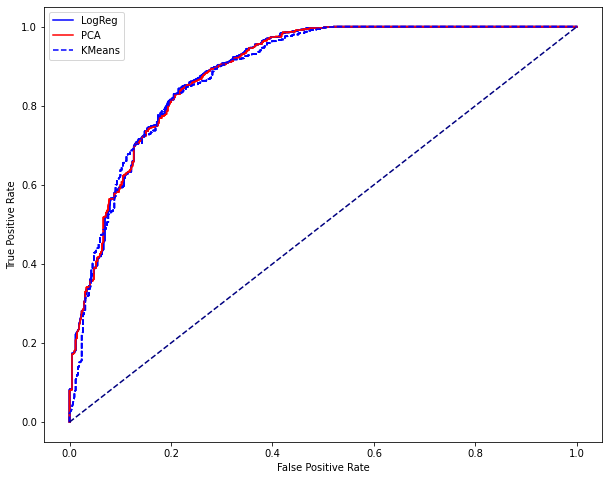

In [84]:
def generate_probs(X, model=pkmeans):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label='NO INJURY / DRIVE AWAY')
    return fpr, tpr
    

fpr_val_lgreg = {}
tpr_val_lgreg = {}
for k in range(1,6):
    fpr_val_lgreg[k], tpr_val_lgreg[k] = generate_roc(y_val,
                                          generate_probs(x_val, model=m_lgreg_models[k]))
    
fpr_val_pca = {}
tpr_val_pca = {}
for j in range(1,6):
    fpr_val_pca[j], tpr_val_pca[j] = generate_roc(y_val,
                                          generate_probs(x_val, model=m_pca_models[j]) )
    
fpr_val_kmeans = {}
tpr_val_kmeans = {}
for i in range(1,6):
    fpr_val_kmeans[i], tpr_val_kmeans[i] = generate_roc(y_val,
                                          generate_probs(x_val, model=m_kmeans_models[i]))



for i in range(1,6):    
    plt.plot(fpr_val_lgreg[i], tpr_val_lgreg[i],'-b')
    plt.plot(fpr_val_pca[i], tpr_val_pca[i],'-r')
    plt.plot(fpr_val_kmeans[i], tpr_val_kmeans[i],'--b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['LogReg','PCA','KMeans'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [85]:
print("validation roc score of logreg: ",roc_auc_score(y_val, generate_probs(x_val, model=plr)))
print("validation roc score of logreg with pca: ",roc_auc_score(y_val, generate_probs(x_val, model=pcav)))
print("validation roc score of logreg with kmeans:",roc_auc_score(y_val, generate_probs(x_val, model=vkmeans)))

validation roc score of logreg:  0.8900259267526313
validation roc score of logreg with pca:  0.8893799041912056
validation roc score of logreg with kmeans: 0.8857677581085489


#### Decision tree

In [86]:
ptr = Pipeline([('data_processing', processing_pipeline), 
              ('dt', DecisionTreeClassifier(criterion = 'entropy', max_depth = 11,min_samples_leaf=2, min_samples_split=5))
             ])
ptr = ptr.fit(X_train, y_train)
m_tr_models = {}
for i in range(1,6):
    m_tr_models[i] = ptr.fit(x_train, y_trainv)
    
print('Models fitted')

Models fitted


In [87]:
trpca = Pipeline([
    ('data_processing', processing_pipeline),
    ('pca', PCA(n_components=47)),
    ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, min_samples_split=5))]
)
trpca = trpca.fit(X_train,y_train)
tr_pca_models = {}
for i in range(1,6):
    tr_pca_models[i] = trpca.fit(x_train, y_trainv)
    
print('Models fitted')

Models fitted


In [88]:
trkmeans = Pipeline([('data_processing', processing_pipeline), 
              ('kmeans', KMeans(n_clusters=69)),
              ('dt', DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,min_samples_leaf=2, min_samples_split=5))
             ])

tr_rawFeatures = trkmeans.fit(x_train, y_trainv)
y_val_trrawFeatures = tr_rawFeatures.predict(x_val)

tr_kmeans_models = {}
for i in range(1,6):
    tr_kmeans_models[i] = trkmeans.fit(x_train, y_trainv)
    
print('Models fitted')

Models fitted


In [89]:
y_val_tr = {}
for k in range(1,6):
    y_val_tr[k] = m_tr_models[k].predict(x_val)
    
    
y_val_trpca = {}
for j in range(1,6):
    y_val_trpca[j] = tr_pca_models[j].predict(x_val)
    

y_val_trkmeans = {}
for i in range(1,6):
    y_val_trkmeans[i] = tr_kmeans_models[i].predict(x_val)
    

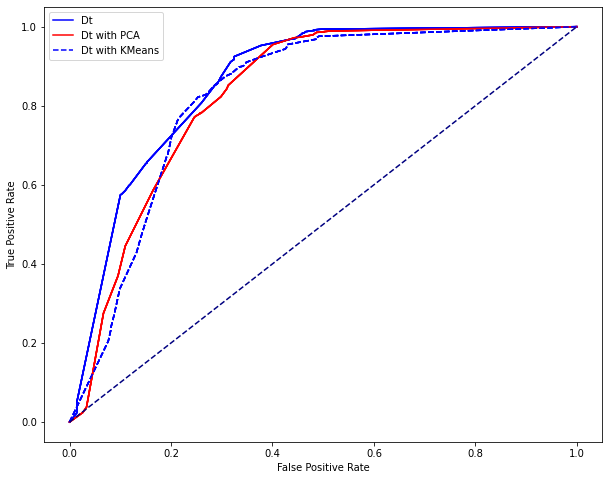

In [90]:
fpr_val_tr = {}
tpr_val_tr = {}
for k in range(1,6):
    fpr_val_tr[k], tpr_val_tr[k] = generate_roc(y_val,
                                          generate_probs(x_val, model=m_tr_models[k]))
    
fpr_val_trpca = {}
tpr_val_trpca = {}
for j in range(1,6):
    fpr_val_trpca[j], tpr_val_trpca[j] = generate_roc(y_val,
                                          generate_probs(x_val, model=tr_pca_models[j]) )
    
fpr_val_trkmeans = {}
tpr_val_trkmeans = {}
for i in range(1,6):
    fpr_val_trkmeans[i], tpr_val_trkmeans[i] = generate_roc(y_val,
                                          generate_probs(x_val, model=tr_kmeans_models[i]))



for i in range(1,6):    
    plt.plot(fpr_val_tr[i], tpr_val_tr[i],'-b')
    plt.plot(fpr_val_trpca[i], tpr_val_trpca[i],'-r')
    plt.plot(fpr_val_trkmeans[i], tpr_val_trkmeans[i],'--b')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Dt','Dt with PCA','Dt with KMeans'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [91]:
print("validation roc score of dec tree: ",roc_auc_score(y_val, generate_probs(x_val, model=ptr)))
print("validation roc score of dec tree with pca: ",roc_auc_score(y_val, generate_probs(x_val, model=trpca)))
print("validation roc score of dec tree with kmeans:",roc_auc_score(y_val, generate_probs(x_val, model=trkmeans)))

validation roc score of dec tree:  0.8608100393193798
validation roc score of dec tree with pca:  0.8312121186106007
validation roc score of dec tree with kmeans: 0.8264474339382908


### Comments on results comparison:
Overall, from the ROC scores in case of Logistic regression with score of 89% than with kmeans and pca, while decision tree had an accuracy of 86% than with pca and kmeans. So, Logistic regression performs better than the decision tree model in prediction of severity of injuries especially case of "NO INJURY/ DRIVE AWAY"

### Ensemble

#### Voting Classifier for evaluating the models in Ensemble with ROC

In [92]:

clf1 = LogisticRegression(penalty='l1', C=4.5, solver='liblinear', random_state=0)
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2, random_state=1)
clf3 = RandomForestClassifier(n_estimators=500)

pipe1 = Pipeline([('data_processing', processing_pipeline),('logreg', clf1)])
pipe2 = Pipeline([('data_processing', processing_pipeline),('tree', clf2)])
pipe3 = Pipeline([('data_processing', processing_pipeline),('rfc', clf3)])

labs = ['Logistic Regression', 'Decision Tree', 'Random Forest']
clfs = [pipe1, pipe2, pipe3]
clfs = zip(labs, clfs)

for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [{lab}]')

ems = [('lr', pipe1),('dt', pipe2),('rfc', pipe3)]
clf4 = VotingClassifier(estimators= ems, weights=None, voting='soft')
clf4 = clf4.fit(X_train,y_train)

scores = cross_val_score(estimator=clf4, X=X_train, y=y_train,cv=10, scoring='roc_auc')
print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

ROC AUC 0.89 (+/- 0.02) [Logistic Regression]
ROC AUC 0.86 (+/- 0.01) [Decision Tree]
ROC AUC 0.86 (+/- 0.01) [Random Forest]
ROC AUC 0.88 (+/- 0.01) [Ensemble]


#### Comments:
From the ensemble, the model roc_auc metric is found to be higher as compared to the individual decision trees, from ensemble, the random forest and logistic regression model are considered to be the better model.

## Summary from Insights:
1. Severity of injuries in the accidents are assesed by fitting into different models of regression and classification.
2. As the target variable is categorical, then models of logistic regression and decision trees are fitted, however, the models suffered from the issues of severe overfitting, multicollinearity, skewness and outliers in the data.
3. The problems of overfitting issues are high when model is fitted in decision trees, showing huge difference in the training and testing data performance metrics.
4. So, with hyper parameters tuning using grid search CV improved the models performance metrics like accuracy, recall, precision. 
5. With the best model parameters, the training data is cross validated with 6 folds to find the best performance.
6. Overall, from the roc curves of validation metrics, the logistic regressiom model is slightly higher in comparison to the decision trees.
7. Overall, Logistic regression with accuracy of 85%, precision of 87%, recall of 75% and roc_auc of 87.51%test data is considered to be the better model.

## Results:

### Logistic Regression:

Accuracy on train data:87.13%

Accuracy on test data:85.53%

Precision on train data:88.48%

Precision on test data:87.44%

Recall on train data:78.32%

Recall on test data:75.89%

The Log Loss on Training is:  0.31443234037164347

The Log Loss on Testing Dataset is:  0.35059837321363496

Training roc_auc: 89.46%

Testing roc_auc: 87.06%



### Decision Trees:

Accuracy on train data:94.56%

Accuracy on test data:81.56%

Precision on train data:94.25%

Precision on test data:77.40%

Recall on train data:91.86%

Recall on test data:75.42%

Training roc_auc: 98.5%

Testing roc_auc: 76.01%

   Among these Decision trees, shows more overfitting issue compared to Logistic regression

## Hyperparameter tuning:


 Logistic Regression 
 ----------------------------------------------------------------------------
                               TESTING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.90      0.55      0.68       535
 
           NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379
 
                         accuracy                           0.86      1914
                        macro avg       0.87      0.76      0.79      1914
                     weighted avg       0.86      0.86      0.84      1914
 
 ----------------------------------------------------------------------------
                               TRAINING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.90      0.60      0.72      2087
 
           NO INJURY / DRIVE AWAY       0.87      0.98      0.92      5567
 
                         accuracy                           0.87      7654
                        macro avg       0.88      0.79      0.82      7654
                     weighted avg       0.88      0.87      0.86      7654
 
 Logistic Regression with Pca
 ----------------------------------------------------------------------------
                               TESTING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.90      0.54      0.68       535
 
           NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379
 
                         accuracy                           0.85      1914
                        macro avg       0.87      0.76      0.79      1914
                     weighted avg       0.86      0.85      0.84      1914
 
 ----------------------------------------------------------------------------
                               TRAINING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.90      0.59      0.72      2087
 
           NO INJURY / DRIVE AWAY       0.86      0.98      0.92      5567
 
                         accuracy                           0.87      7654
                        macro avg       0.88      0.78      0.82      7654
                     weighted avg       0.87      0.87      0.86      7654
 
 Logistic Regression with Kmeans
 ----------------------------------------------------------------------------
                               TESTING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.90      0.55      0.68       535
 
           NO INJURY / DRIVE AWAY       0.85      0.98      0.91      1379
 
                         accuracy                           0.86      1914
                        macro avg       0.87      0.76      0.80      1914
                     weighted avg       0.86      0.86      0.84      1914
 
 ----------------------------------------------------------------------------
                               TRAINING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.90      0.58      0.70      2087
 
           NO INJURY / DRIVE AWAY       0.86      0.98      0.91      5567
 
                         accuracy                           0.87      7654
                        macro avg       0.88      0.78      0.81      7654
                     weighted avg       0.87      0.87      0.86      7654
 					
 					
 					
 					
 Decision tree 
 ----------------------------------------------------------------------------
                               TESTING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.90      0.52      0.65       535
 
           NO INJURY / DRIVE AWAY       0.84      0.98      0.90      1379
 
                         accuracy                           0.85      1914
                        macro avg       0.87      0.75      0.78      1914
                     weighted avg       0.85      0.85      0.83      1914
 
 ----------------------------------------------------------------------------
                               TRAINING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.94      0.56      0.70      2087
 
           NO INJURY / DRIVE AWAY       0.86      0.99      0.92      5567
 
                         accuracy                           0.87      7654
                        macro avg       0.90      0.77      0.81      7654
                     weighted avg       0.88      0.87      0.86      7654
 
 Decision tree with Pca
 ----------------------------------------------------------------------------
                               TESTING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.91      0.53      0.67       535
 
           NO INJURY / DRIVE AWAY       0.84      0.98      0.91      1379
 
                         accuracy                           0.85      1914
                        macro avg       0.88      0.75      0.79      1914
                     weighted avg       0.86      0.85      0.84      1914
 
 ----------------------------------------------------------------------------
                               TRAINING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.93      0.57      0.71      2087
 
           NO INJURY / DRIVE AWAY       0.86      0.98      0.92      5567
 
                         accuracy                           0.87      7654
                        macro avg       0.89      0.78      0.81      7654
                     weighted avg       0.88      0.87      0.86      7654
 
 Decision tree with Kmeans
 ----------------------------------------------------------------------------
                               TESTING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
 
    INJURY AND / OR TOW DUE TO CRASH       0.92      0.50      0.64       535
 
           NO INJURY / DRIVE AWAY       0.83      0.98      0.90      1379
 
                         accuracy                           0.85      1914
                        macro avg       0.88      0.74      0.77      1914
                     weighted avg       0.86      0.85      0.83      1914
 
 ----------------------------------------------------------------------------
                               TRAINING DATA                                 
 ----------------------------------------------------------------------------
                                   precision    recall  f1-score   support
                                   
    INJURY AND / OR TOW DUE TO CRASH       0.91      0.55      0.69      2087
 
           NO INJURY / DRIVE AWAY       0.85      0.98      0.91      5567
 
                         accuracy                           0.86      7654
                        macro avg       0.88      0.77      0.80      7654
                     weighted avg       0.87      0.86      0.85      7654
                    

### Logistic Regression:

Logistic Regression AUC: 87.01%

Logistic Regression with PCA AUC: 87.06%

Logistic Regression with k-Means AUC: 87.51%

### Decision Trees:

Decision Trees AUC: 84.71%

Decision Trees with PCA AUC: 84.34%

Decision Trees with k-Means AUC: 81.53%

   From these results, Logistic regression performs better.
   
### Ensemble:

ROC AUC 0.89 (+/- 0.02) [Logistic Regression]

ROC AUC 0.86 (+/- 0.01) [Decision Tree]

ROC AUC 0.86 (+/- 0.01) [Random Forest]

ROC AUC 0.88 (+/- 0.01) [Ensemble]

     From score of ensembles, it performs better with 88%, Random forest also performs better if it is tuned to best hyper parameters.

## Conclusion:


  In conclusion, now a days, accidents due to crashes of vehicles during traffic are most common that depends on the factors of weather, road condition traffic condition in particular street direction, street name in the city, light conditions and condition of device in particular time, day. So, from 2022 data, although the severity of injuries are proven to be lower, and our models are 85% accurate of predicting the severity of injuries.
  In the future, to avoid the injuries during crashes, drivers need to take care of the weather, light conditions, device conditions especially travelling in the particular street during peak hours in a particular day.

## References:
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

https://github.com/appliedecon/data602-lectures